# STAT 207 Homework 2 [25 points]

## Understanding Data and Asking Questions

Due: Friday, January 26, end of day (11:59 pm CT)*

*Late Submissions: accepted until Thursday, February 1 at 11:59 pm
<hr>

## Set Up the Data

First, we'll set up the file so that we can complete our data analysis.  We'll import Python packages including pandas, which helps when analyzing a dataset, and visualization packages.  We'll also load in our data and save it as `df` for later analysis.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [55]:
df = pd.read_csv('Billionaire.csv')
df

Name NetWorth        Country         Source  Rank  \
0                   Jeff Bezos   $177 B  United States         Amazon     1   
1                    Elon Musk   $151 B  United States  Tesla, SpaceX     2   
2     Bernard Arnault & family   $150 B         France           LVMH     3   
3                   Bill Gates   $124 B  United States      Microsoft     4   
4              Mark Zuckerberg    $97 B  United States       Facebook     5   
...                        ...      ...            ...            ...   ...   
2750         Daniel Yong Zhang     $1 B          China     e-commerce  2674   
2751             Zhang Yuqiang     $1 B          China     Fiberglass  2674   
2752             Zhao Meiguang     $1 B          China    gold mining  2674   
2753            Zhong Naixiong     $1 B          China   conglomerate  2674   
2754           Zhou Wei family     $1 B          China       Software  2674   

       Age          Industry  
0     57.0        Technology  
1     49.0        Automotive  
2     72.0  Fashion & Retail  
3     65.0        Technology  
4     36.0        Technology  
...    ...               ...  
2750  49.0        Technology  
2751  65.0     Manufacturing  
2752  58.0   Metals & Mining  
2753  58.0       Diversified  
2754  54.0        Technology  

[2755 rows x 7 columns]

We'll work with a data set about the world's billionaires from 2021 (https://www.forbes.com/real-time-billionaires/#49c85f6e3d78).  This data is contained in the "Billionaire.csv" file located in the same folder.

We've read this data in above.

## 1. Understanding the Billionaires Data [1 point]

Display the first several lines of the data frame.

In [56]:
df.head(10)

Name NetWorth        Country              Source  Rank  \
0                Jeff Bezos   $177 B  United States              Amazon     1   
1                 Elon Musk   $151 B  United States       Tesla, SpaceX     2   
2  Bernard Arnault & family   $150 B         France                LVMH     3   
3                Bill Gates   $124 B  United States           Microsoft     4   
4           Mark Zuckerberg    $97 B  United States            Facebook     5   
5            Warren Buffett    $96 B  United States  Berkshire Hathaway     6   
6             Larry Ellison    $93 B  United States            software     7   
7                Larry Page  $91.5 B  United States              Google     8   
8               Sergey Brin    $89 B  United States              Google     9   
9             Mukesh Ambani  $84.5 B          India         diversified    10   

    Age               Industry  
0  57.0             Technology  
1  49.0             Automotive  
2  72.0       Fashion & Retail  
3  65.0             Technology  
4  36.0             Technology  
5  90.0  Finance & Investments  
6  76.0             Technology  
7  48.0             Technology  
8  47.0             Technology  
9  63.0            Diversified

## 2. Billionaires Data Basics [1 point]

Use Python to report the dimensions of the data.

In [57]:
df.shape

(2755, 7)

## 3. Variable Types [1 point]

What is the variable type as recorded in Python for each variable in the Billionaire data?

In [58]:
df.dtypes

Name         object
NetWorth     object
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

## 4. Asking and Answering Questions [1 point]

You will pose a question that you can answer using the available data.  Below, use Python to answer your question, using numerical summaries, graphical visualizations, or both.  You will also upload this output to Gradescope as either a file upload or pasting your output from below.

### Which industries have the most billionares in descending order and who has the most networth in each industry?

In [59]:
df['Industry'].unique()

array(['Technology', 'Automotive', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Food & Beverage',
       'Telecom', 'Media & Entertainment', 'Service',
       'Gambling & Casinos', 'Manufacturing', 'Real Estate',
       'Metals & Mining', 'Energy', 'Logistics', 'Healthcare',
       'Construction & Engineering', 'Sports'], dtype=object)

In [60]:
df = df.copy()
df['NetWorth'] = df['NetWorth'].str.replace(' B', '')
df['NetWorth'] = df['NetWorth'].str.replace('$', '').astype('float')
df.dtypes

Name         object
NetWorth    float64
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

In [61]:
df_group_industry = df.groupby('Industry').agg('count').reset_index()
df_group_industry = df_group_industry[['Industry', 'NetWorth']].rename( columns = {'NetWorth' : 'N_Billionaires'})
print(df_group_industry.head())
print(' ')
print('Number of Observations:')
print(len(df_group_industry))

                     Industry  N_Billionaires
0                  Automotive              68
1  Construction & Engineering              44
2                 Diversified             188
3                      Energy             100
4            Fashion & Retail             273
 
Number of Observations:
18


In [62]:
technology                = df[ df.Industry == 'Technology'                ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
automotive                = df[ df.Industry == 'Automotive'                ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
fashion_retail            = df[ df.Industry == 'Fashion & Retail'          ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
finance_investments       = df[ df.Industry == 'Finance & Investments'     ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
diversified               = df[ df.Industry == 'Diversified'               ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
food_beverage             = df[ df.Industry == 'Food & Beverage'          ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
telecom                   = df[ df.Industry == 'Telecom'                   ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
media_entertainment       = df[ df.Industry == 'Media & Entertainment'     ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
service                   = df[ df.Industry == 'Service'                   ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
gambling_casinos          = df[ df.Industry == 'Gambling & Casinos'        ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
manufacturing             = df[ df.Industry == 'Manufacturing'             ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
real_estate               = df[ df.Industry == 'Real Estate'               ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
metals_mining             = df[ df.Industry == 'Metals & Mining'           ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
energy                    = df[ df.Industry == 'Energy'                    ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
logistics                 = df[ df.Industry == 'Logistics'                 ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
healthcare                = df[ df.Industry == 'Healthcare'                ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
construction_engineering  = df[ df.Industry == 'Construction & Engineering'].nlargest(1, 'NetWorth')[['Industry', 'Name']]
sports                    = df[ df.Industry == 'Sports'                    ].nlargest(1, 'NetWorth')[['Industry', 'Name']]
list = [technology, automotive, fashion_retail, finance_investments, diversified, food_beverage, telecom,
        media_entertainment, service, gambling_casinos, manufacturing, real_estate, metals_mining, energy, logistics,
        healthcare, construction_engineering, sports]

In [63]:
df_people_best = pd.concat(list).reset_index()
df_people_best['index'] = df_people_best['index'] + 1
df_people_best = df_people_best.rename( columns= {'index' : 'Rank'})
df_people_best.head()

Rank               Industry                      Name
0     1             Technology                Jeff Bezos
1     2             Automotive                 Elon Musk
2     3       Fashion & Retail  Bernard Arnault & family
3     6  Finance & Investments            Warren Buffett
4    10            Diversified             Mukesh Ambani

In [64]:
df_result = pd.merge(df_group_industry, df_people_best, on = 'Industry', how = 'left')
df_result = df_result[['Industry', 'N_Billionaires', 'Name']].rename( columns = {'Name' : 'Richest_in_Industry'}).sort_values(
    'N_Billionaires', ascending = False).reset_index().drop( columns = 'index')
df_result

Industry  N_Billionaires        Richest_in_Industry
0        Finance & Investments             371             Warren Buffett
1                   Technology             365                 Jeff Bezos
2                Manufacturing             331               He Xiangjian
3             Fashion & Retail             273   Bernard Arnault & family
4                   Healthcare             221    Jiang Rensheng & family
5              Food & Beverage             219             Zhong Shanshan
6                  Real Estate             215               Lee Shau Kee
7                  Diversified             188              Mukesh Ambani
8                       Energy             100                 Robin Zeng
9        Media & Entertainment              95          Michael Bloomberg
10                     Service              75                   Wang Wei
11             Metals & Mining              74  Alexey Mordashov & family
12                  Automotive              68                  Elon Musk
13  Construction & Engineering              44            Pallonji Mistry
14                   Logistics              35       Klaus-Michael Kuehne
15                     Telecom              32  Carlos Slim Helu & family
16          Gambling & Casinos              25             Miriam Adelson
17                      Sports              24                Jerry Jones

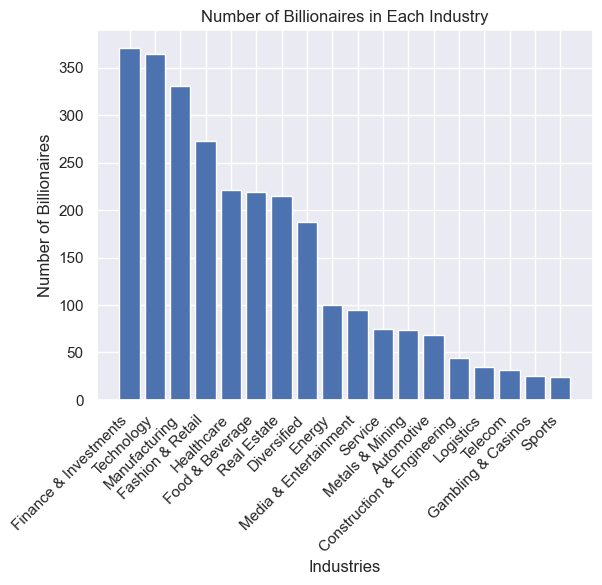

In [67]:
plt.bar(df_result['Industry'], df_result['N_Billionaires'])
plt.xlabel('Industries')
plt.ylabel('Number of Billionaires')
plt.title('Number of Billionaires in Each Industry')
plt.xticks(rotation=45, ha='right')
plt.show()

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 2 Canvas Assignment to submit your notebook to GitHub.  Be sure to also complete the Gradescope component of this assignment.